In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from config import DATA_DIR, RESULTS_DIR

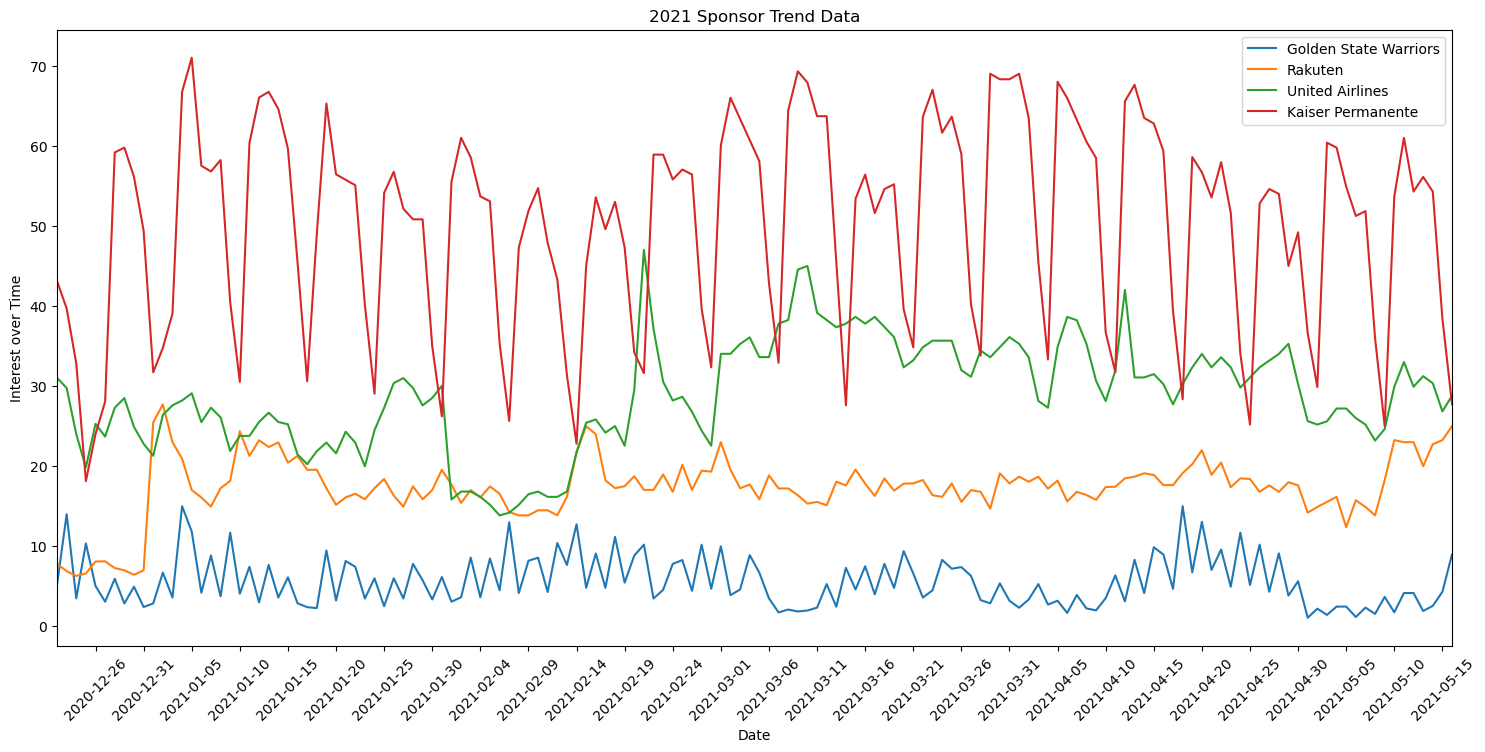

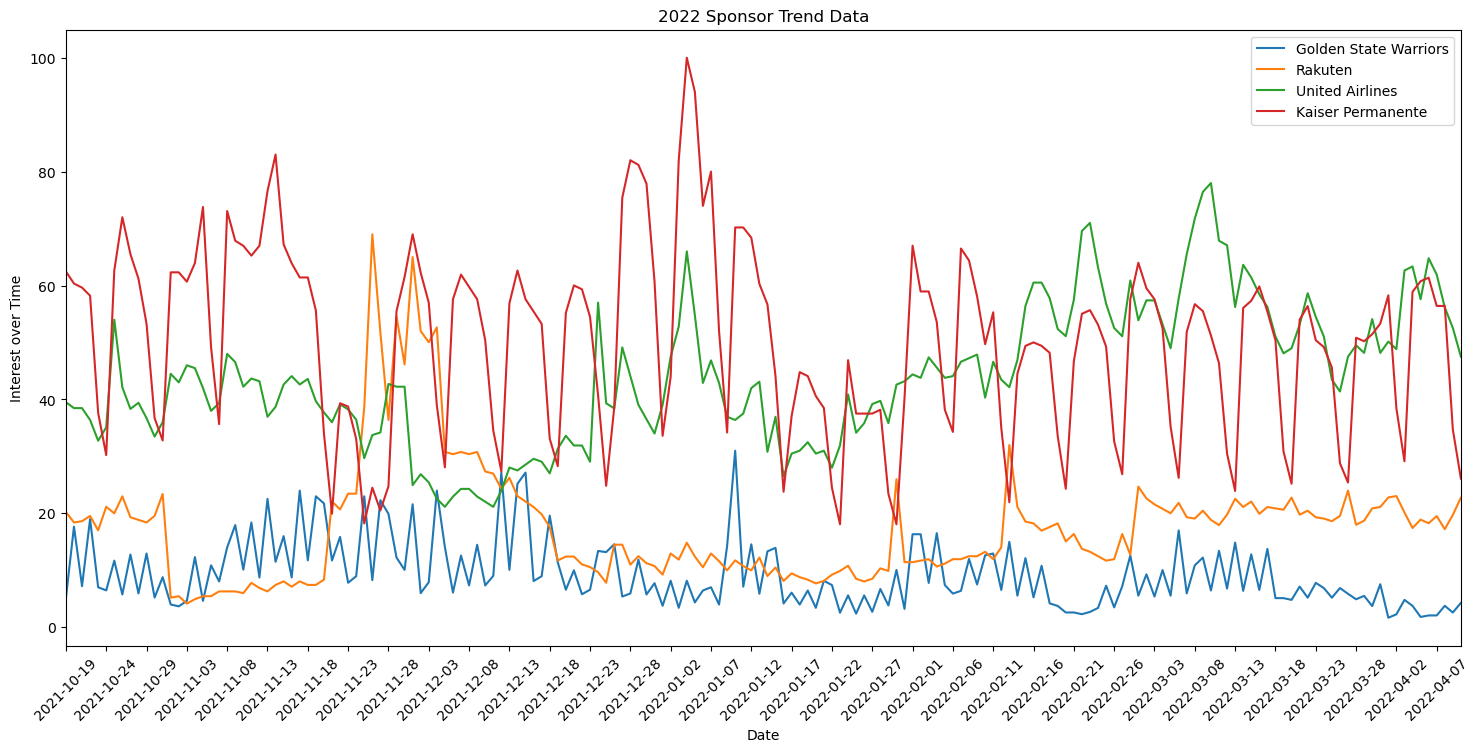

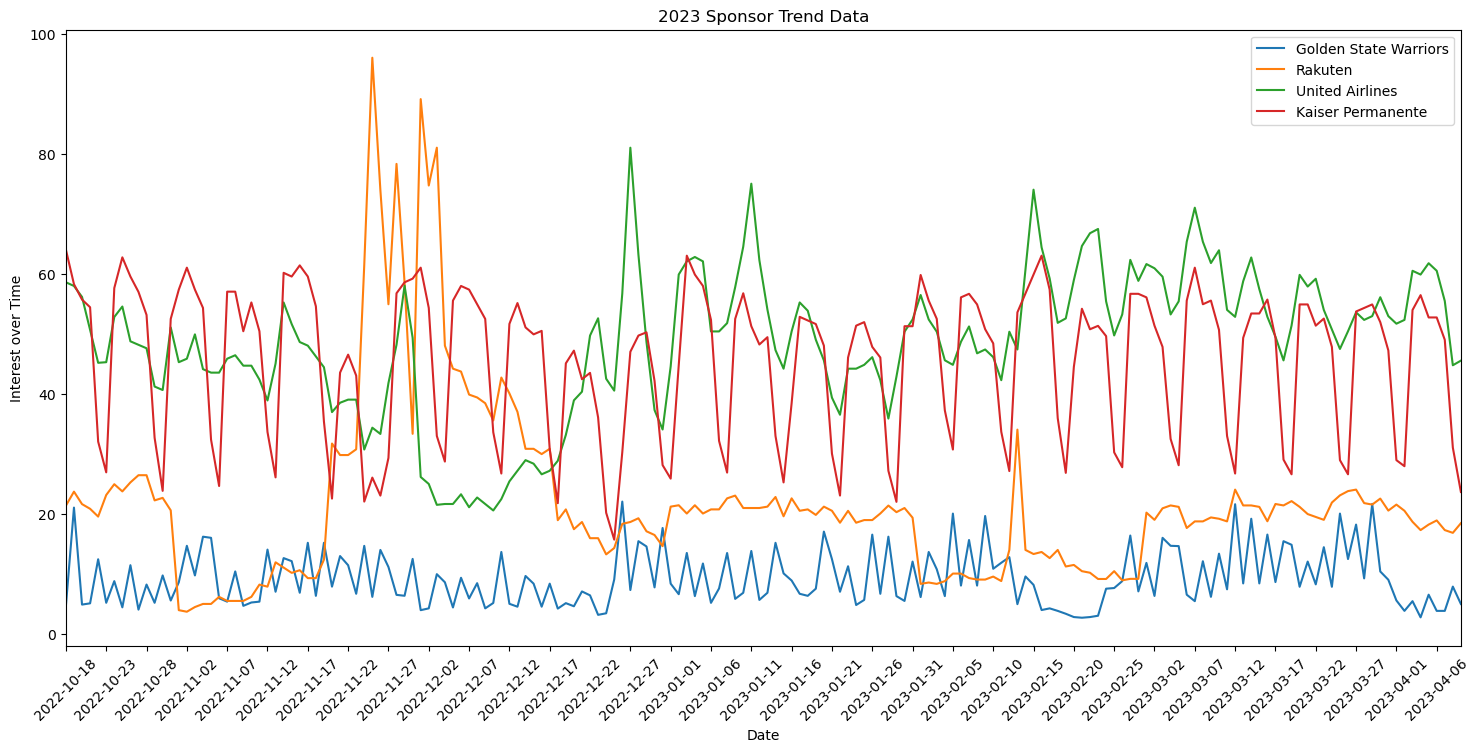

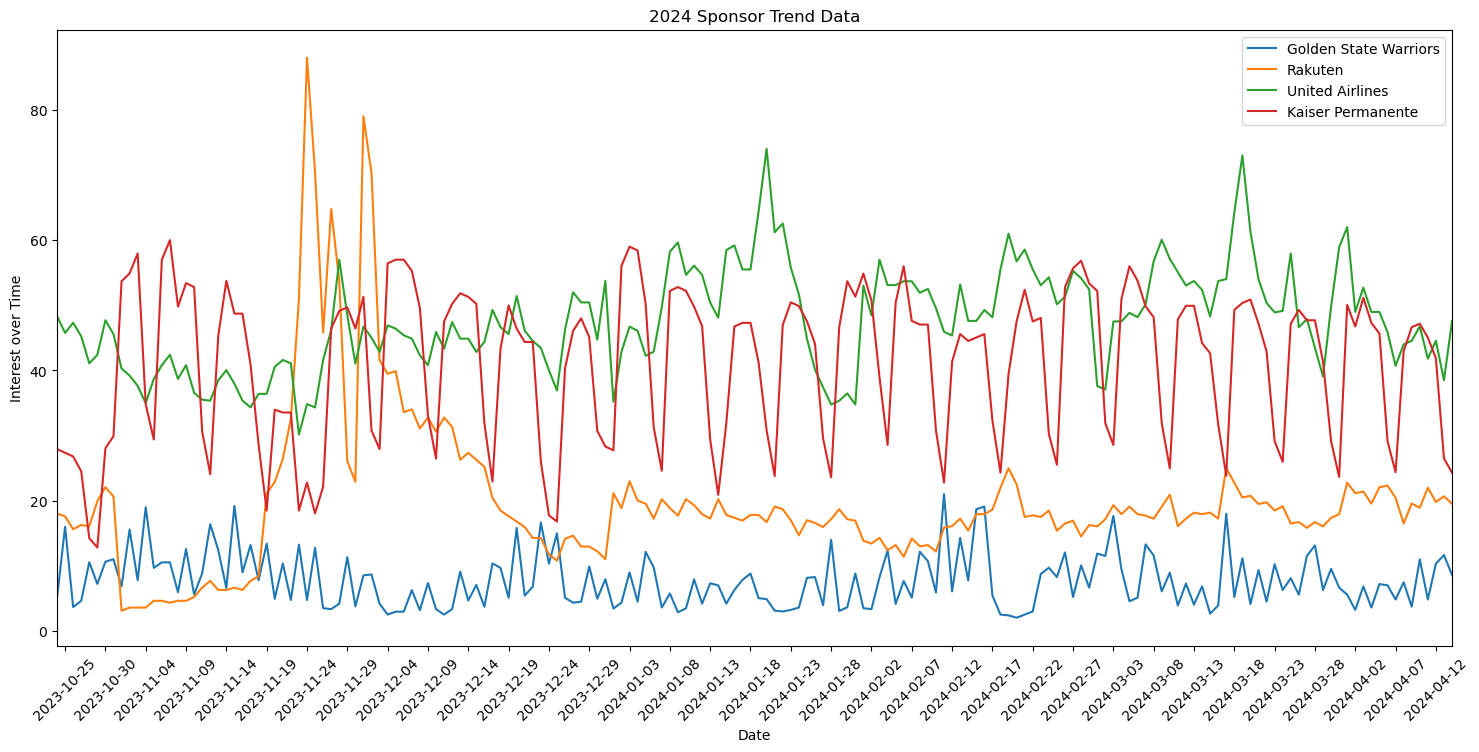

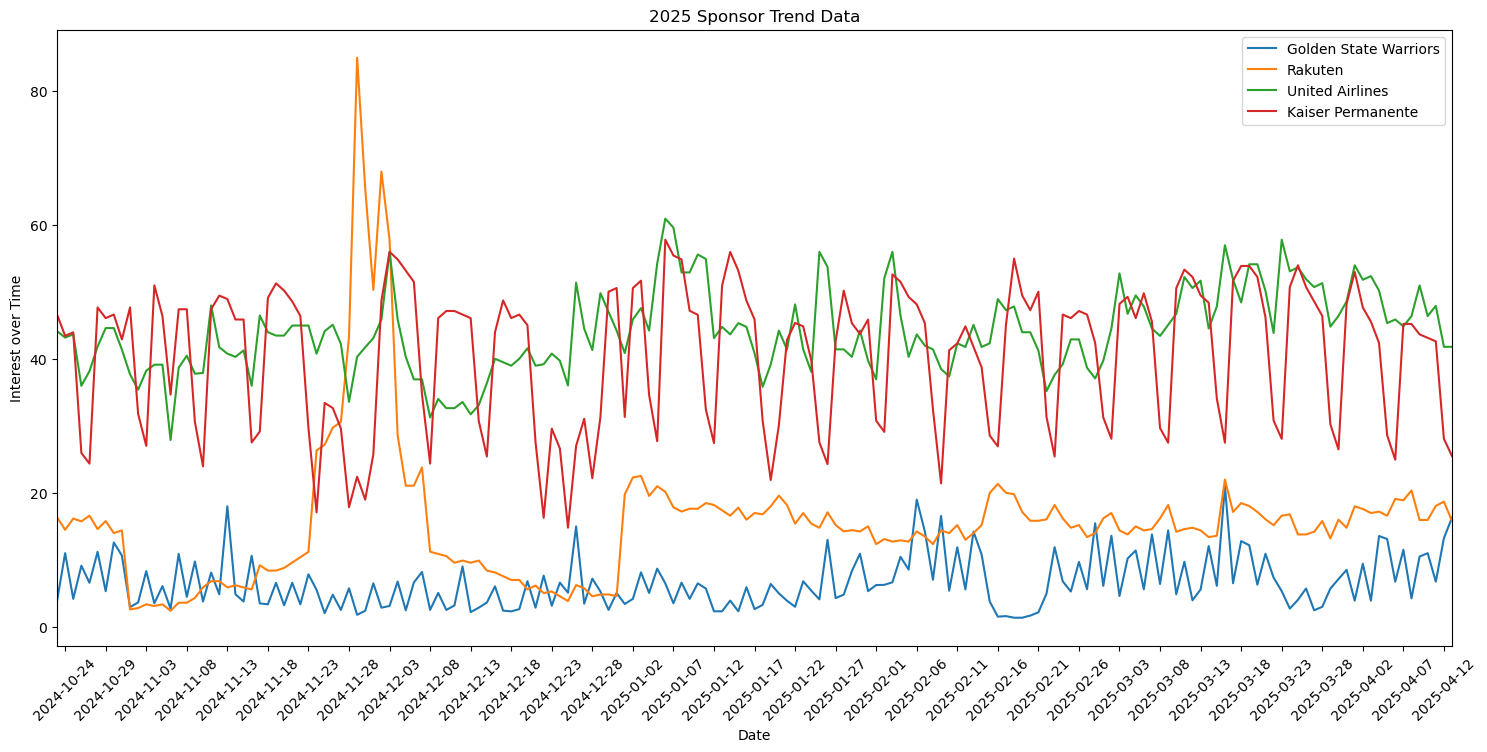

In [3]:
all_trends = pd.read_csv('../data/cleaned/All_Trends_Cleaned.csv', parse_dates=['Date'])

season_dates = [(2021,'2020-12-22','2021-05-16'),(2022,'2021-10-19','2022-04-10'),(2023,'2022-10-18','2023-04-09'),(2024,'2023-10-24','2024-04-14'),(2025,'2024-10-23','2025-04-13')]

for year,start_date,end_date in season_dates:
    season_range = (all_trends['Date'] >= pd.to_datetime(start_date)) & (all_trends['Date'] <= pd.to_datetime(end_date))
    plt.figure(figsize=(18,8))
    for keyword in all_trends.columns:
        if keyword == "Date":
            continue
        plt.plot(all_trends.loc[season_range,"Date"], all_trends.loc[season_range,keyword], label=keyword)

    plt.title(f'{year} Sponsor Trend Data')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Interest over Time')

    # Set x-axis major ticks every 10 days
    ax = plt.gca()
    ax.set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    plt.xticks(rotation=45)

    plt.show()